The pandas digits dataset
Here I am going to creat a convolution neural network to clasify digits from given data. 

In [1]:
import pandas as pd

In [2]:
digits=pd.read_csv('C:/Users/cmscomputers/Downloads/Skype/digitsnpixels.csv')         #data file import

In [3]:
digits

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
digits.shape

(42000, 785)

In [8]:
A=digits.drop('label',axis=1).values

# Plotting an image from data set 

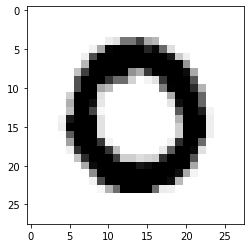

In [41]:
import matplotlib.pyplot as plt
plt.imshow(A[1:2].reshape(28,28),cmap=plt.cm.binary)           #the image size is (28,28),colormap is black n white

# Define X And Y in array format

In [11]:
Y=digits.label.values

In [13]:
Y_en=pd.get_dummies(Y)           #OHE encoding 

In [14]:
Y_en

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
41995,1,0,0,0,0,0,0,0,0,0
41996,0,1,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,1,0,0
41998,0,0,0,0,0,0,1,0,0,0


In [42]:
X_scale=A/255                  
X_scale                         #standardization 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Training and Testing data

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_scale,Y_en,test_size=0.2,random_state=21)


In [19]:
xtrain.shape

(33600, 784)

In [20]:
xtest.shape

(8400, 784)

In [43]:
xtrain=xtrain.reshape(33600,28,28,1)
xtest=xtest.reshape(8400,28,28,1)                        #reshaping the data into imaage size format

In [44]:
xtrain

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

# Creating a Convolutional NN 

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,BatchNormalization,Flatten

In [27]:
nn= Sequential()
nn.add(Convolution2D(filters=20,kernel_size=(3,3),activation= 'relu',input_shape=(28,28,1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))
nn.add(Flatten())
       
nn.add(Dense(120,activation='relu'))
nn.add(Dense(10,activation='softmax'))       

In [28]:
nn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
nn.fit(xtrain,ytrain,epochs=10,batch_size=70)

Epoch 1/10
480/480 [==============================] - 27s 48ms/step - loss: 0.1804 - accuracy: 0.9432
Epoch 2/10
480/480 [==============================] - 24s 50ms/step - loss: 0.0595 - accuracy: 0.9803
Epoch 3/10
480/480 [==============================] - 24s 49ms/step - loss: 0.0338 - accuracy: 0.9889
Epoch 4/10
480/480 [==============================] - 24s 49ms/step - loss: 0.0237 - accuracy: 0.9919
Epoch 5/10
480/480 [==============================] - 26s 54ms/step - loss: 0.0197 - accuracy: 0.9927
Epoch 6/10
480/480 [==============================] - 25s 52ms/step - loss: 0.0173 - accuracy: 0.9945
Epoch 7/10
480/480 [==============================] - 23s 48ms/step - loss: 0.0116 - accuracy: 0.9960
Epoch 8/10
480/480 [==============================] - 24s 50ms/step - loss: 0.0149 - accuracy: 0.9946
Epoch 9/10
480/480 [==============================] - 23s 49ms/step - loss: 0.0118 - accuracy: 0.9960
Epoch 10/10
480/480 [==============================] - 24s 49ms/step - loss: 0.012

In [36]:
pred_tr_prob=nn.predict(xtrain)
pred_ts_prob=nn.predict(xtest)

In [37]:
import numpy as np
ytrain=np.argmax(pred_tr,axis=1)
ytest=np.argmax(pred_ts,axis=1)
pred_tr=np.argmax(pred_tr_prob,axis=1)
pred_ts=np.argmax(pred_ts_prob,axis=1)

In [38]:
from sklearn.metrics import accuracy_score
tr_acc=accuracy_score(ytrain,pred_tr)
ts_acc=accuracy_score(ytest,pred_ts)

In [39]:
ts_acc

1.0

In [40]:
ts_acc

1.0